In [2]:
import math
import random as rnd
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import clear_output,display, HTML
from time import sleep
import ipywidgets as widgets 
import networkx as nx
import numpy as np
from matplotlib.colors import ListedColormap
from scipy import stats, mean
dbug = True
plt.rcParams["figure.figsize"] = (12,6)  

In [3]:
class Agent:
    def __init__(self,id,bw):
        self.id = id
        self.bw = bw
        self.links=[]
        
    def add_edge(self,agent):
        if agent != self:
            if agent not in self.links:
                self.links.append(agent)
                       

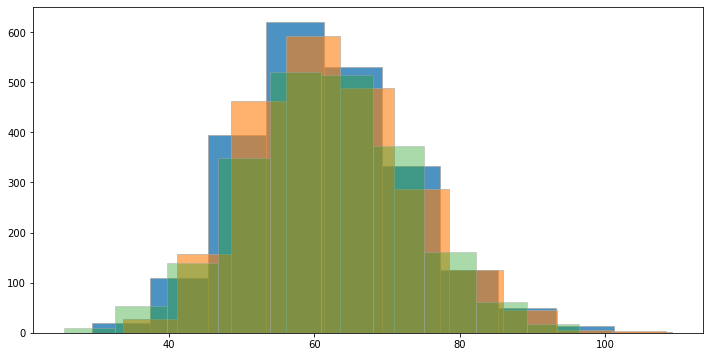

Mean 2009:61.73 Stdv 11.2576 Mean 2011:61.51 p:0.0198 p_gen:0.5047 


In [25]:

data_file = open("BW.csv")
data_2009=np.array([ float(x) for x in data_file ]) 
plt.hist(data_2009,alpha=0.8,edgecolor="darkgray")
data_file = open("Change_BW.csv")
data_2011=np.array([ float(x) for x in data_file ]) 
plt.hist(data_2011,alpha=0.6,edgecolor="darkgray")
gen_data = np.random.normal(loc=61.73, scale=11.2576, size=len(data_2009))
plt.hist(gen_data,alpha=0.4,edgecolor="darkgray")
plt.show()
t_stat, p_val = stats.ttest_ind(data_2009,data_2011, equal_var=True)
t_stat2, p_val2 = stats.ttest_ind(data_2009,gen_data, equal_var=True)
lab = "Mean 2009:{:.2f} Stdv {:.4f} Mean 2011:{:.2f} p:{:.4f} p_gen:{:.4f} "
print(lab.format(data_2009.mean(),data_2009.std(),gen_data.mean(),p_val,p_val2))

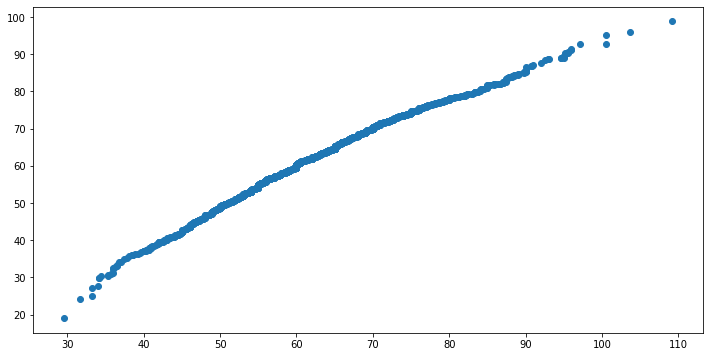

In [23]:
data_2009.sort()
gen_data.sort()
plt.scatter(data_2009,gen_data)

In [5]:
agents= [Agent(i,data_2009[i]) for i in range(len(data_2009))]
print(len(agents))

2197


In [6]:
network = nx.erdos_renyi_graph(len(agents),8/len(agents))

In [7]:
len(list(network.nodes()))

2197

In [8]:
edges = list(network.edges())
for edge in edges:
    a1 = agents[edge[0]]
    a2 = agents[edge[1]]
    a1.add_edge(a2)
    a2.add_edge(a1)
                

In [9]:
network_agent = nx.Graph()
for a in agents:
    network_agent.add_node(a.id)
for a in agents:
    for b in a.links:
        network_agent.add_edge(a.id,b.id)

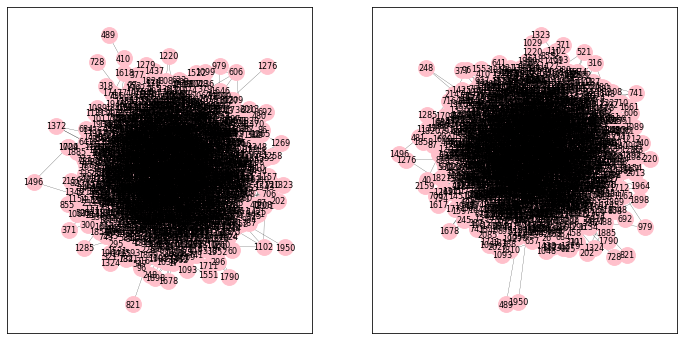

In [10]:
gcc = sorted(nx.connected_components(network), key=len, reverse=True)
g0 = network.subgraph(gcc[0])
gcc_agent = sorted(nx.connected_components(network_agent), key=len, reverse=True)
g0_agent = network_agent.subgraph(gcc_agent[0])
plt.subplot(1,2,1)
nx.draw_networkx(g0,node_color = "pink",node_size=250,width=0.2,font_size=8) 
plt.subplot(1,2,2)
nx.draw_networkx(g0_agent,node_color = "pink",node_size=250,width=0.2,font_size=8) 
plt.show()

In [11]:
# for i in range(len(agents)):
#     print(network.edges(i))
#     print(network_agent.edges(i))

In [12]:
degree = dict(network.degree())
values = [ value for k,value in degree.items()]
degree = dict(network_agent.degree())
values_agent = [ value for k,value in degree.items()]

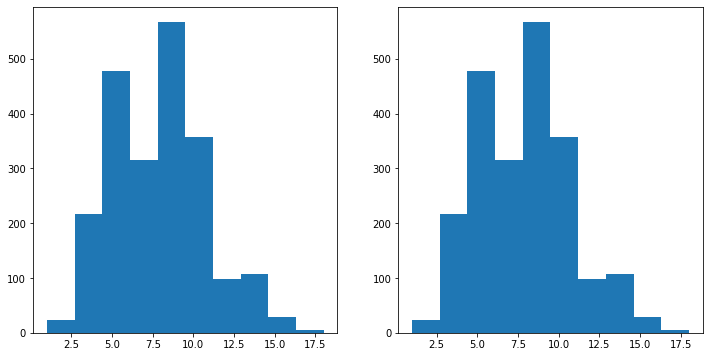

In [13]:
plt.subplot(1,2,1)
plt.hist(values)
plt.subplot(1,2,2)
plt.hist(values_agent)
plt.show()

In [14]:
t_stat, p_val = stats.ttest_ind(values , values_agent, equal_var=False)
print(t_stat,p_val)

0.0 1.0
